# Research Workflow

This notebook demonstrates the research [workflow](https://langchain-ai.github.io/langgraph/tutorials/workflows/) that creates comprehensive reports through a series of focused steps. The system:

1. Uses a **graph workflow** with specialized nodes for each report creation stage
2. Enables user **feedback and approval** at critical planning points 
3. Produces a well-structured report with introduction, researched body sections, and conclusion

## From repo 

In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

c:\Users\vedan\GitHub\open_deep_research\src


## From package 

In [2]:
! pip install -U -q open-deep-research

# Compile the Graph-Based Research Workflow

The next step is to compile the LangGraph workflow that orchestrates the report creation process. This defines the sequence of operations and decision points in the research pipeline.

In [3]:
# Import required modules and initialize the builder from open_deep_research
import uuid 
import os, getpass
import open_deep_research   
print(open_deep_research.__version__) 
from IPython.display import Image, display, Markdown
from langgraph.types import Command
from langgraph.checkpoint.memory import MemorySaver
from open_deep_research.graph import builder

0.0.15


In [4]:
# Create a memory-based checkpointer and compile the graph
# This enables state persistence and tracking throughout the workflow execution

memory = MemorySaver()
graph = builder.compile(checkpointer=memory)

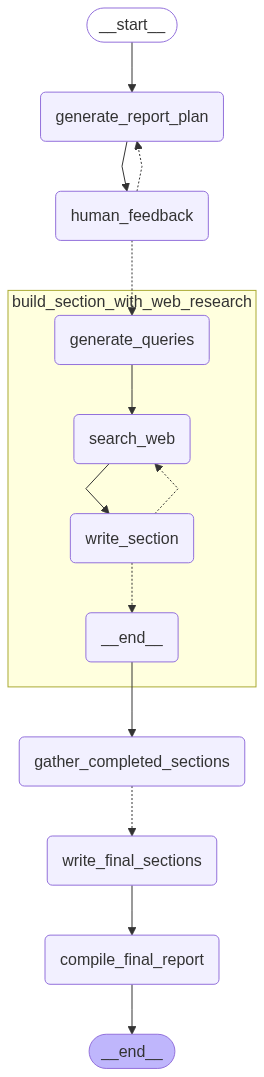

In [10]:
# Visualize the graph structure
# This shows the nodes and edges in the research workflow

display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [ ]:
# Helper function to set environment variables for API keys
# This ensures all necessary credentials are available for various services

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

# Set the API keys used for any model or search tool selections below, such as:
_set_env("OPEN AI KEY HERE")
#_set_env("ANTROPIC API KEY)
# _set_env("TAVILY_API_KEY")
# _set_env("GROQ_API_KEY")
# _set_env("PERPLEXITY_API_KEY")

In [7]:
# Define report structure template and configure the research workflow
# This sets parameters for models, search tools, and report organization

REPORT_STRUCTURE = """Use this structure to create a report on the user-provided topic:

1. Introduction (no research needed)
   - Brief overview of the topic area

2. Main Body Sections:
   - Each section should focus on a sub-topic of the user-provided topic
   
3. Conclusion
   - Aim for 1 structural element (either a list of table) that distills the main body sections 
   - Provide a concise summary of the report"""

# Configuration option 1: Claude 3.7 Sonnet for planning with perplexity search
# thread = {"configurable": {"thread_id": str(uuid.uuid4()),
#                            "search_api": "perplexity",
#                            "planner_provider": "anthropic",
#                            "planner_model": "claude-3-7-sonnet-latest",
#                            # "planner_model_kwargs": {"temperature":0.8}, # if set custom parameters
#                            "writer_provider": "anthropic",
#                            "writer_model": "claude-3-5-sonnet-latest",
#                            # "writer_model_kwargs": {"temperature":0.8}, # if set custom parameters
#                            "max_search_depth": 2,
#                            "report_structure": REPORT_STRUCTURE,
#                            }}

# # Configuration option 2: DeepSeek-R1-Distill-Llama-70B for planning and llama-3.3-70b-versatile for writing
# thread = {"configurable": {"thread_id": str(uuid.uuid4()),
#                            "search_api": "tavily",
#                            "planner_provider": "groq",
#                            "planner_model": "deepseek-r1-distill-llama-70b",
#                            "writer_provider": "groq",
#                            "writer_model": "llama-3.3-70b-versatile",
#                            "report_structure": REPORT_STRUCTURE,
#                            "max_search_depth": 1,}
#                            }

# Configuration option 3: Use OpenAI o3 for both planning and writing (selected option)
thread = {"configurable": {"thread_id": str(uuid.uuid4()),
                           "search_api": "tavily",
                           "planner_provider": "openai",
                           "planner_model": "gpt-4o-mini-2024-07-18",
                           "writer_provider": "openai",
                           "writer_model": "gpt-4o-mini-2024-07-18",
                           "max_search_depth": 2,
                           "report_structure": REPORT_STRUCTURE,
                           }}

# Define research topic about Model Context Protocol
topic = "Overview of AI. Give an indepth architecural review of how AI works for developers. Make sure to compare differences between different industry models out there."
# Run the graph workflow until first interruption (waiting for user feedback)
async for event in graph.astream({"topic":topic,}, thread, stream_mode="updates"):
    if '__interrupt__' in event:
        interrupt_value = event['__interrupt__'][0].value
        display(Markdown(interrupt_value))

CancelledError: 

# User Feedback Phase

* This allows for providing directed feedback on the initial report plan
* The user can review the proposed report structure and provide specific guidance
* The system will incorporate this feedback into the final report plan

In [ ]:
# Submit feedback on the report plan
# The system will continue execution with the updated requirements

# Provide specific feedback to focus and refine the report structure
async for event in graph.astream(Command(resume="Looks great! Please add another section called 'How AI will effect jobs'."), thread, stream_mode="updates"):
    if '__interrupt__' in event:
        interrupt_value = event['__interrupt__'][0].value
        display(Markdown(interrupt_value))

Please provide feedback on the following report plan. 
                        

Section: Introduction
Description: A brief overview of Artificial Intelligence (AI) and its significance in software development, emphasizing its role as a transformative technology.
Research needed: No


Section: Understanding AI Architectures
Description: An exploration of different AI architectures, including traditional machine learning models, deep learning frameworks, and generative AI techniques, focusing on how they function and their use cases.
Research needed: Yes


Section: Comparison of Industry Models
Description: A detailed comparison of various AI industry models including those from tech giants like Google, Microsoft, and OpenAI; this section will highlight the unique features, benefits, and limitations of each model.
Research needed: Yes


Section: Real-World Implementations of AI
Description: Case studies illustrating successful AI deployments in different sectors such as healthcare, finance, and telecommunications, showcasing practical applications and the resulting impact.
Research needed: Yes


Section: Agent2Agent (A2A) Protocol Overview
Description: An introduction to the Agent2Agent protocol, including its functionalities and uses in AI interactions, followed by a comparison to the Multi-Agent Communication Protocol (MCP) to showcase differences in performance and application.
Research needed: Yes


Section: Conclusion
Description: A summary of the key findings from the report, including insights from the sections discussed, and potential future trends in AI architecture and applications.
Research needed: No


                        
Does the report plan meet your needs?
Pass 'true' to approve the report plan.
Or, provide feedback to regenerate the report plan:

# Final Approval Phase
* After incorporating feedback, approve the plan to start content generation

In [ ]:
# Approve the final plan and execute the report generation
# This triggers the research and writing phases for all sections

# The system will now:
# 1. Research each section topic
# 2. Generate content with citations
# 3. Create introduction and conclusion
# 4. Compile the final report

async for event in graph.astream(Command(resume=True), thread, stream_mode="updates"):
    print(event)
    print("\n")

{'human_feedback': None}




Task write_section with path ('__pregel_pull', 'write_section') wrote to unknown channel branch:to:__end__, ignoring it.


{'build_section_with_web_research': {'completed_sections': [Section(name='Comparison of Industry Models', description='A detailed comparison of various AI industry models including those from tech giants like Google, Microsoft, and OpenAI; this section will highlight the unique features, benefits, and limitations of each model.', research=True, content="## Comparison of Industry Models\n\nThe AI landscape features various models from tech giants such as Google, Microsoft, and OpenAI, each with unique attributes catering to diverse applications. \n\n**OpenAI's ChatGPT** is a leader in versatile, multimodal interactions. It excels in creative content generation, data analysis, and even real-time coding capabilities, making it a favored choice among developers and researchers alike[^1^]. Its advanced complex reasoning also positions it for various applications from content creation to technical support.\n\nIn contrast, **Microsoft’s Azure OpenAI** offers seamless integration with the Micr

Task write_section with path ('__pregel_pull', 'write_section') wrote to unknown channel branch:to:__end__, ignoring it.


{'build_section_with_web_research': {'completed_sections': [Section(name='Understanding AI Architectures', description='An exploration of different AI architectures, including traditional machine learning models, deep learning frameworks, and generative AI techniques, focusing on how they function and their use cases.', research=True, content='## Understanding AI Architectures\n\nArtificial Intelligence (AI) architectures can be broadly categorized into traditional machine learning, deep learning frameworks, and generative AI models. Each architecture functions differently and serves distinct purposes, making them relevant for various applications.\n\nTraditional machine learning relies on algorithms like decision trees and support vector machines, which excel at problems with structured data and require considerable feature engineering. Developers often need to manually select features to input into these models, which makes traditional methods less scalable for complex tasks requirin

Task write_section with path ('__pregel_pull', 'write_section') wrote to unknown channel branch:to:__end__, ignoring it.


{'build_section_with_web_research': {'completed_sections': [Section(name='Real-World Implementations of AI', description='Case studies illustrating successful AI deployments in different sectors such as healthcare, finance, and telecommunications, showcasing practical applications and the resulting impact.', research=True, content="## Real-World Implementations of AI\n\nAI applications have significantly transformed various sectors, particularly healthcare, finance, and telecommunications. In **healthcare**, IBM's Watson exemplifies AI's role in enhancing patient care by processing vast medical data to improve diagnostics and treatment plans, achieving accuracy improvements of up to 30% and reducing diagnosis times significantly [1][8]. Furthermore, the **Hawaii Department of Transportation** has employed AI to design a platform that predicts crash incidents, optimizing safety measures and potentially saving lives [2]. \n\nIn the **finance** sector, institutions like American Express u

Task write_section with path ('__pregel_pull', 'write_section') wrote to unknown channel branch:to:__end__, ignoring it.


{'build_section_with_web_research': {'completed_sections': [Section(name='Agent2Agent (A2A) Protocol Overview', description='An introduction to the Agent2Agent protocol, including its functionalities and uses in AI interactions, followed by a comparison to the Multi-Agent Communication Protocol (MCP) to showcase differences in performance and application.', research=True, content='## Agent2Agent (A2A) Protocol Overview\n\nThe Agent2Agent (A2A) protocol facilitates robust communication between AI agents, enabling them to collaborate effectively across varied systems and frameworks. Central to A2A is the concept of "Agent Cards," which disclose each agent\'s capabilities and allow for the discovery of suitable agents for specific tasks [1](https://kodekloud.com/blog/agent2agent-a2a-protocol-a-friendly-guide-to-the-future-of-ai-communication/). \n\nIn comparison, the Model Context Protocol (MCP) primarily focuses on agent-to-tool interactions, providing a mechanism for agents to access ex

In [ ]:
# Display the final generated report
# Retrieve the completed report from the graph's state and format it for display

final_state = graph.get_state(thread)
report = final_state.values.get('final_report')
Markdown(report)

# Overview of AI: An In-Depth Architectural Review for Developers

Artificial Intelligence (AI) is a transformative technology redefining software development. It empowers developers to leverage complex algorithms and models to create intelligent applications that automate decisions, improve accuracy, and enhance user experiences. This report examines various AI architectures, including traditional machine learning, deep learning, and generative AI, outlining their functionalities and applications. Additionally, it compares industry models from leading companies like OpenAI, Microsoft, and Google, showcasing their unique attributes and suitability for different use cases. Real-world implementations across healthcare, finance, and logistics further illustrate AI's impactful presence in multiple sectors. 

## Conclusion

In summation, this report highlights the multifaceted nature of AI architectures, emphasizing their diverse functionalities and applications. Traditional machine learning excels with structured data, while deep learning thrives with unstructured datasets, both requiring different development approaches. Generative AI stands out for its innovative content generation capabilities, beneficial across creative domains. The comparative analysis reveals how industry giants, such as OpenAI with its ChatGPT, Microsoft through Azure OpenAI, and Google with Vertex AI, offer tailored solutions catering to specific needs. For instance, while OpenAI emphasizes versatility, Microsoft focuses on seamless integration for business productivity. Moving forward, organizations should assess these insights and deploy AI strategically to maximize operational benefits. 

| AI Model           | Key Features                                       | Best Use Cases                      |
|--------------------|---------------------------------------------------|-------------------------------------|
| OpenAI's ChatGPT   | Versatile, multimodal interactions                | Content generation, tech support    |
| Microsoft Azure AI | Integration with Microsoft 365, strong NLP focus | Chatbots, virtual assistants         |
| Google Vertex AI   | Data-driven, hybrid model support                  | Complex analytics, large-scale research |

## Understanding AI Architectures

Artificial Intelligence (AI) architectures can be broadly categorized into traditional machine learning, deep learning frameworks, and generative AI models. Each architecture functions differently and serves distinct purposes, making them relevant for various applications.

Traditional machine learning relies on algorithms like decision trees and support vector machines, which excel at problems with structured data and require considerable feature engineering. Developers often need to manually select features to input into these models, which makes traditional methods less scalable for complex tasks requiring pattern recognition from raw data [1](https://theceoviews.com/comparing-deep-learning-and-traditional-machine-learning/) [2](https://shelf.io/blog/choose-your-ai-weapon-deep-learning-or-traditional-machine-learning/).

In contrast, deep learning utilizes neural networks with multiple layers to automatically extract relevant features without manual input. This architecture shines in processing unstructured data, such as images and text, making it a go-to choice for applications like speech recognition and medical image analysis. However, deep learning requires expansive datasets and significant computational resources due to its complexity [1](https://theceoviews.com/comparing-deep-learning-and-traditional-machine-learning/) [3](https://www.alliancetek.com/blog/post/2025/03/11/deep-learning-vs-traditional-ml.aspx).

Generative AI focuses on creating new content, using models like GANs and VAEs, which generate data similar to what they were trained on. This is particularly beneficial in creative sectors, enhancing content generation for art, music, and even drug discovery. Its capacity to produce high-quality output makes it invaluable for modern applications [7](https://www.superannotate.com/blog/generative-ai-explained) [8](https://www.parangat.com/an-introduction-to-generative-ai-and-its-applications/).

### Sources
[1] Comparing Deep Learning and Traditional Machine Learning: https://theceoviews.com/comparing-deep-learning-and-traditional-machine-learning/  
[2] Choose Your AI Weapon: Deep Learning or Traditional Machine Learning: https://shelf.io/blog/choose-your-ai-weapon-deep-learning-or-traditional-machine-learning/  
[3] Deep Learning vs. Traditional Machine Learning: Which is Better?: https://www.alliancetek.com/blog/post/2025/03/11/deep-learning-vs-traditional-ml.aspx  
[7] Generative AI: Complete overview of the techniques and applications: https://www.superannotate.com/blog/generative-ai-explained  
[8] An Introduction to Generative AI and its Applications: https://www.parangat.com/an-introduction-to-generative-ai-and-its-applications/  

## Comparison of Industry Models

The AI landscape features various models from tech giants such as Google, Microsoft, and OpenAI, each with unique attributes catering to diverse applications. 

**OpenAI's ChatGPT** is a leader in versatile, multimodal interactions. It excels in creative content generation, data analysis, and even real-time coding capabilities, making it a favored choice among developers and researchers alike[^1^]. Its advanced complex reasoning also positions it for various applications from content creation to technical support.

In contrast, **Microsoft’s Azure OpenAI** offers seamless integration with the Microsoft 365 suite, making it ideal for businesses deeply embedded in that ecosystem[^2^]. Azure OpenAI focuses on natural language processing (NLP), particularly for creating chatbots and virtual assistants, enhancing productivity for office professionals[^3^].

**Google’s Vertex AI**, on the other hand, stands out due to its robust data analytics capabilities and hybrid model support, combining both custom and pre-trained models under a unified interface[^3^]. Its advanced multimodal features allow it to handle diverse input types, making it suitable for complex, data-driven applications like large-scale research[^1^].

While all models serve varying purposes, the choice often depends on specific organizational needs, existing infrastructure, and application requirements.

### Sources
[^1^] AI Model Comparison: Which AI Reigns Supreme in 2025? - Done For You: https://doneforyou.com/ai-model-comparison-which-ai-reigns-supreme-in-2025/  
[^2^] Amazon Bedrock vs Azure OpenAI vs Google Vertex AI: An In-Depth Analysis: https://www.cloudoptimo.com/blog/amazon-bedrock-vs-azure-openai-vs-google-vertex-ai-an-in-depth-analysis/  
[^3^] AWS Bedrock vs. Google Vertex AI vs Azure OpenAI: A Comparative Overview: https://www.ankursnewsletter.com/p/aws-bedrock-vs-google-vertex-ai-vs

## Real-World Implementations of AI

AI applications have significantly transformed various sectors, particularly healthcare, finance, and telecommunications. In **healthcare**, IBM's Watson exemplifies AI's role in enhancing patient care by processing vast medical data to improve diagnostics and treatment plans, achieving accuracy improvements of up to 30% and reducing diagnosis times significantly [1][8]. Furthermore, the **Hawaii Department of Transportation** has employed AI to design a platform that predicts crash incidents, optimizing safety measures and potentially saving lives [2]. 

In the **finance** sector, institutions like American Express utilize machine learning for real-time fraud detection, thereby minimizing losses from fraudulent activities [1]. Another example of AI's impact is in **logistics**: UPS's ORION system optimizes delivery routes using AI, which has resulted in savings of millions of miles driven each year, enhancing sustainability and operational efficiency [5][4]. 

These case studies highlight the transformative power of AI across multiple industries, showcasing its potential in improving operational efficiencies, enhancing services, and significantly impacting end-user experiences.

### Sources
1. 60 Detailed Artificial Intelligence Case Studies [2025]: https://digitaldefynd.com/IQ/artificial-intelligence-case-studies/
2. Case Study – Driving Transportation Safety Forward with AI: https://www.atssa.com/resource/case-study-driving-transportation-safety-forward-with-ai/
3. Top 15 Real-Life Use Cases For AI In Transportation Industry: https://redresscompliance.com/top-15-real-life-use-cases-for-ai-in-transportation-industry/
4. AI in Transportation: Benefits, Use Cases, and Examples: https://appinventiv.com/blog/ai-in-transportation/
5. 5 AI Case Studies in Logistics: https://www.vktr.com/ai-disruption/5-ai-case-studies-in-logistics/
6. The application of artificial intelligence in health financing: a scoping review: https://resource-allocation.biomedcentral.com/articles/10.1186/s12962-023-00492-2
7. The Impact of Artificial Intelligence on Healthcare - PubMed: https://pubmed.ncbi.nlm.nih.gov/39763580/
8. Enhancing interpretability and accuracy of AI models in healthcare: a comprehensive review: https://www.frontiersin.org/journals/robotics-and-ai/articles/10.3389/frobt.2024.1444763/full

## Agent2Agent (A2A) Protocol Overview

The Agent2Agent (A2A) protocol facilitates robust communication between AI agents, enabling them to collaborate effectively across varied systems and frameworks. Central to A2A is the concept of "Agent Cards," which disclose each agent's capabilities and allow for the discovery of suitable agents for specific tasks [1](https://kodekloud.com/blog/agent2agent-a2a-protocol-a-friendly-guide-to-the-future-of-ai-communication/). 

In comparison, the Model Context Protocol (MCP) primarily focuses on agent-to-tool interactions, providing a mechanism for agents to access external resources and operational contexts [6](https://getstream.io/blog/agent2agent-vs-mcp/). While A2A excels in horizontal interoperability among different agents—in essence facilitating collaborative workflows—MCP emphasizes vertical integration allowing agents to access tools and data. This delineation enhances the system's overall effectiveness, as MCP can supply pertinent data while A2A manages inter-agent communications [4](https://oxylabs.io/blog/mcp-vs-a2a).

Together, these protocols represent complementary methodologies that enhance the capabilities of AI agents, assisting in executing complex tasks more proficiently than a single agent could achieve alone. 

### Sources
[1] Agent2Agent (A2A) Protocol Explained for Everyone - KodeKloud: https://kodekloud.com/blog/agent2agent-a2a-protocol-a-friendly-guide-to-the-future-of-ai-communication/  
[4] MCP vs A2A: Which Protocol Is Better For AI Agents? [2025] - Blott Studio: https://www.blott.studio/blog/post/mcp-vs-a2a-which-protocol-is-better-for-ai-agents  
[6] LLM Context Protocols: Agent2Agent vs. MCP - AI: https://getstream.io/blog/agent2agent-vs-mcp/  
[8] MCP vs A2A: Everything you need to know - Composio: https://composio.dev/blog/mcp-vs-a2a-everything-you-need-to-know  

# Overview of AI

Artificial Intelligence (AI) has grown to be a crucial element in modern technology, driving innovation across various industries. This report delves into the intricate architectures that underpin AI, including traditional machine learning, deep learning frameworks, and generative AI models. We explore how these architectures serve unique functions and applications, for instance, IBM's Watson in healthcare and OpenAI's ChatGPT for natural language processing. It also highlights the differing approaches of industry leaders like Google and Microsoft, laying out practical case studies, including AI's impact on logistics and telecommunications, and concludes with an examination of the Agent2Agent protocol that enhances AI collaboration. 

## Conclusion

This report reveals the multifaceted nature of AI architecture and its diverse applications across industries. Traditional machine learning, while effective for structured data with significant feature engineering, is complemented by deep learning's capability to process unstructured data, as seen in healthcare implementations that improved diagnostic accuracy. The comparative insights into industry models from OpenAI, Google, and Microsoft demonstrate tailored solutions for various operational needs. 

| AI Model        | Key Features                                      | Best Suited For         |
|------------------|--------------------------------------------------|-------------------------|
| OpenAI's ChatGPT | Multimodal interactions, complex reasoning       | Content generation, coding |
| Microsoft Azure   | Seamless integration with Microsoft 365          | Business productivity     |
| Google Vertex AI  | Robust data analytics, hybrid model support      | Large-scale research     |

The future of AI architecture holds promise for further innovations in inter-agent communication protocols, enhancing collaboration among AI systems, exemplified by movements towards frameworks like the Agent2Agent protocol. Organizations must strategically adopt these advancements to harness AI's full potential.

Trace: 

> Note: uses 80k tokens 

https://smith.langchain.com/public/31eca7c9-beae-42a3-bef4-5bce9488d7be/r